In [1]:
# Load specific forecasting and evaluation tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import dates
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy


                     RMS_Value
time                          
2019-11-28 07:00:00   0.984083
2019-11-28 07:01:00   1.246701
2019-11-28 07:02:00   1.004492
2019-11-28 07:03:00   0.979750
2019-11-28 07:04:00   0.886278
2019-11-28 07:05:00   0.905190
2019-11-28 07:06:00   0.959868
2019-11-28 07:07:00   0.948778
2019-11-28 07:08:00   0.988192
2019-11-28 07:09:00   0.951107
2019-11-28 07:10:00   0.927097
2019-11-28 07:11:00   0.923010
2019-11-28 07:12:00   0.962012
2019-11-28 07:13:00   0.948916
2019-11-28 07:14:00   0.865217
2019-11-28 07:15:00   0.963713
2019-11-28 07:16:00   0.915931
2019-11-28 07:17:00   0.922979
2019-11-28 07:18:00   0.935591
2019-11-28 07:19:00   0.933210


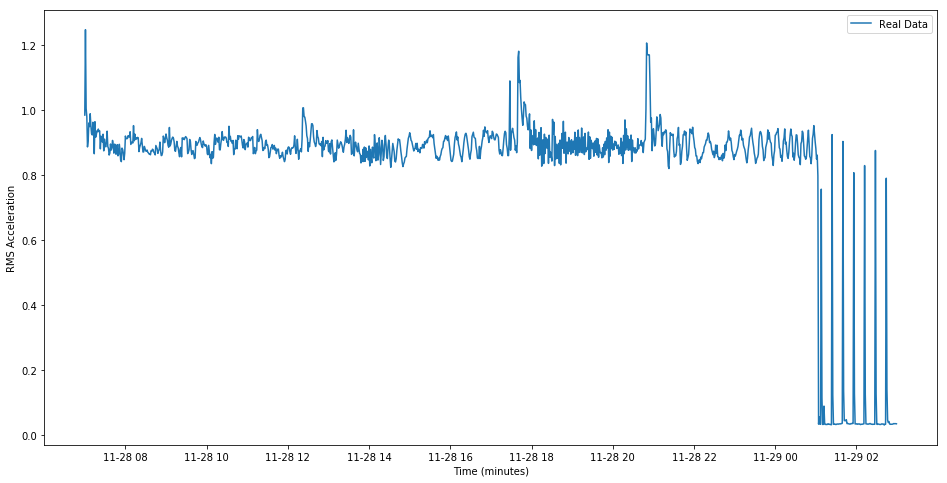

In [3]:
# Multiple out of sample forecast
# Load the data 
df = pd.read_excel('TestData1D_nightF.xls', header=0, index_col=0, parse_dates= True)
# display first few rows
print(df.head(20))
# line plot of dataset
plt.figure(figsize=(16,8))
plt.plot(df['RMS_Value'], label = 'Real Data')
plt.ylabel('RMS Acceleration')
plt.xlabel('Time (minutes)')
plt.legend(loc='best')
plt.show()

In [5]:
#split the dataset
split_point = len(df) - 200
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_excel('dataset.xlsx', index=False) 
validation.to_excel('validation.xlsx', index=False)

Dataset 1000, Validation 200


In [6]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)


In [7]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


In [8]:
# Load the data
X = dataset.values
minutes_in_hour = 60
differenced = difference(X, minutes_in_hour)


In [9]:
# fit model
model = ARIMA(differenced, order=(2,0,2))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  940
Model:                     ARMA(2, 2)   Log Likelihood                1635.168
Method:                       css-mle   S.D. of innovations              0.042
Date:                Tue, 25 Feb 2020   AIC                          -3258.335
Time:                        12:44:54   BIC                          -3229.260
Sample:                             0   HQIC                         -3247.251
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.005     -0.315      0.753      -0.012       0.008
ar.L1.y        0.4045      0.148      2.737      0.006       0.115       0.694
ar.L2.y        0.2402      0.123      1.960      0.0

In [45]:
# multi-step out-of-sample forecast
forecast, SE, Interval = model_fit.forecast(steps=200)

In [46]:
# invert the differenced forecast to something usable
history = [x for x in X]
minute = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, minutes_in_hour)
	print('Minute %d: %f' % (minute, inverted))
	history.append(inverted)
	minute += 1


Minute 1: 0.911979
Minute 2: 0.906748
Minute 3: 0.875427
Minute 4: 0.889320
Minute 5: 0.867913
Minute 6: 0.870221
Minute 7: 0.900070
Minute 8: 0.880445
Minute 9: 0.904102
Minute 10: 0.903567
Minute 11: 0.910262
Minute 12: 0.935781
Minute 13: 0.918480
Minute 14: 0.906426
Minute 15: 0.912549
Minute 16: 0.898717
Minute 17: 0.874238
Minute 18: 0.868542
Minute 19: 0.854548
Minute 20: 0.845628
Minute 21: 0.861294
Minute 22: 0.856551
Minute 23: 0.863487
Minute 24: 0.871634
Minute 25: 0.877659
Minute 26: 0.886905
Minute 27: 0.903262
Minute 28: 0.920532
Minute 29: 0.919497
Minute 30: 0.936303
Minute 31: 0.922914
Minute 32: 0.905355
Minute 33: 0.910624
Minute 34: 0.890189
Minute 35: 0.882757
Minute 36: 0.877369
Minute 37: 0.864771
Minute 38: 0.847670
Minute 39: 0.835692
Minute 40: 0.848397
Minute 41: 0.874980
Minute 42: 0.891688
Minute 43: 0.915062
Minute 44: 0.918915
Minute 45: 0.929954
Minute 46: 0.942118
Minute 47: 0.914353
Minute 48: 0.898049
Minute 49: 0.884739
Minute 50: 0.865350
Minute 51

In [47]:
dfResults = pd.DataFrame(history)
print (dfResults)



             0
0     0.984083
1     1.246701
2     1.004492
3     0.979750
4     0.886278
5     0.905190
6     0.959868
7     0.948778
8     0.988192
9     0.951107
10    0.927097
11    0.923010
12    0.962012
13    0.948916
14    0.865217
15    0.963713
16    0.915931
17    0.922979
18    0.935591
19    0.933210
20    0.941054
21    0.932782
22    0.935456
23    0.880312
24    0.919264
25    0.904525
26    0.901409
27    0.925333
28    0.874059
29    0.910226
...        ...
1170  0.851315
1171  0.830622
1172  0.837913
1173  0.846519
1174  0.849981
1175  0.859181
1176  0.904375
1177  0.923301
1178  0.928729
1179  0.924780
1180  0.907116
1181  0.901885
1182  0.870564
1183  0.884457
1184  0.863050
1185  0.865358
1186  0.895207
1187  0.875582
1188  0.899238
1189  0.898704
1190  0.905399
1191  0.930918
1192  0.913617
1193  0.901563
1194  0.907686
1195  0.893854
1196  0.869375
1197  0.863679
1198  0.849685
1199  0.840765

[1200 rows x 1 columns]


In [48]:
split_point = len(dfResults) - 200
dataset2, forecast = dfResults[0:split_point], dfResults[split_point:]
print('Dataset2 %d, Forecast %d' % (len(dataset2), len(forecast)))
dataset2.to_excel('dataset2.xlsx', index=False) 
forecast.to_excel('forecast.xlsx', index=False)



Dataset2 1000, Forecast 200


In [24]:
# reset index of the forecast to 0 
forecast.reset_index(drop=True, inplace=True)
forecast.head()


,0
0,0.911979
1,0.906748
2,0.875427
3,0.889320
4,0.867913


In [25]:
# reset index of the validate to 0 
validation.reset_index(drop=True, inplace=True)
validation.head()

,RMS_Value
0,0.918328
1,0.888138
2,0.876965
3,0.844144
4,0.850566


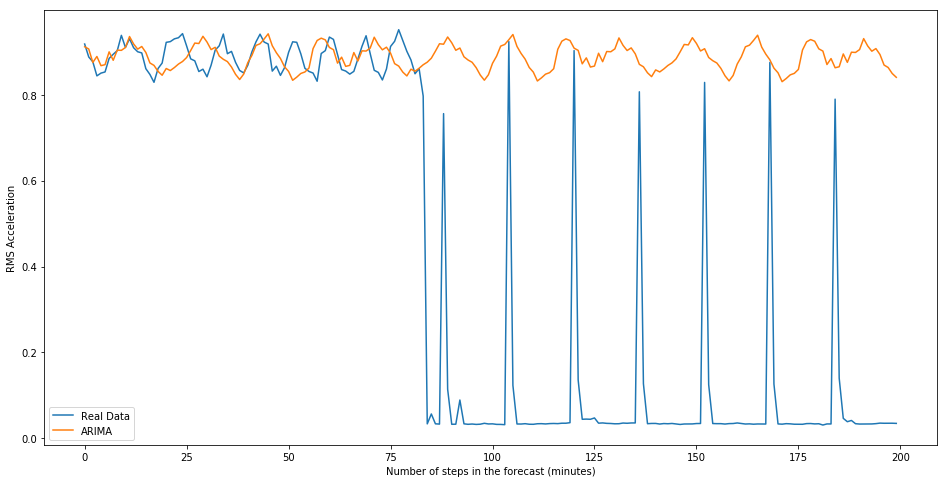

In [26]:
plt.figure(figsize=(16,8))
plt.plot(validation['RMS_Value'], label = 'Real Data')
plt.plot(forecast, label = 'ARIMA' )
plt.ylabel('RMS Acceleration')
plt.xlabel('Number of steps in the forecast (minutes)')
plt.legend(loc='best')
plt.show()


In [64]:
rms = sqrt(mean_squared_error(forecast, validation))
print(rms)


0.04407143923191845


Confidence intervals:


AttributeError: 'DataFrame' object has no attribute 'conf_int'

In [125]:
Interval

array([[-0.14541088,  0.02361983],
       [-0.14183369,  0.05219416],
       [-0.14419248,  0.07646533],
       [-0.14049888,  0.08943695],
       [-0.13737418,  0.0983288 ],
       [-0.13433179,  0.10417513],
       [-0.13186301,  0.10820088],
       [-0.12988515,  0.11099643],
       [-0.12835745,  0.11296714],
       [-0.1271922 ,  0.11436938],
       [-0.12631453,  0.11537476],
       [-0.12565809,  0.11609982],
       [-0.12516987,  0.11662498],
       [-0.12480811,  0.11700662],
       [-0.12454078,  0.11728464],
       [-0.12434363,  0.11748754],
       [-0.12419845,  0.11763582],
       [-0.12409164,  0.1177443 ],
       [-0.12401313,  0.11782371],
       [-0.12395545,  0.11788187],
       [-0.12391308,  0.11792449],
       [-0.12388198,  0.11795573],
       [-0.12385915,  0.11797864],
       [-0.1238424 ,  0.11799543],
       [-0.12383011,  0.11800775],
       [-0.12382109,  0.11801678],
       [-0.12381447,  0.11802341],
       [-0.12380961,  0.11802827],
       [-0.12380605,

In [52]:
dfIntervalFull = pd.DataFrame(Interval)
dfIntervalFull.head()

,0,1
0,-0.025188,0.141298
1,-0.050219,0.141459
2,-0.077410,0.141049
3,-0.090740,0.137242
4,-0.100397,0.133339


In [53]:
history_int = [x for x in X]
minute = 1
for yhat in dfIntervalFull.iloc[:,0]:
	inverted = inverse_difference(history_int, yhat, minutes_in_hour)
	print('Minute %d: %f' % (minute, inverted))
	history_int.append(inverted)
	minute += 1

Minute 1: 0.828736
Minute 2: 0.810909
Minute 3: 0.766198
Minute 4: 0.775329
Minute 5: 0.751045
Minute 6: 0.751936
Minute 7: 0.781009
Minute 8: 0.760975
Minute 9: 0.784411
Minute 10: 0.783759
Minute 11: 0.790392
Minute 12: 0.815876
Minute 13: 0.798558
Minute 14: 0.786494
Minute 15: 0.792612
Minute 16: 0.778776
Minute 17: 0.754296
Minute 18: 0.748599
Minute 19: 0.734605
Minute 20: 0.725684
Minute 21: 0.741350
Minute 22: 0.736607
Minute 23: 0.743543
Minute 24: 0.751690
Minute 25: 0.757715
Minute 26: 0.766961
Minute 27: 0.783318
Minute 28: 0.800588
Minute 29: 0.799553
Minute 30: 0.816359
Minute 31: 0.802970
Minute 32: 0.785411
Minute 33: 0.790680
Minute 34: 0.770245
Minute 35: 0.762813
Minute 36: 0.757425
Minute 37: 0.744828
Minute 38: 0.727726
Minute 39: 0.715748
Minute 40: 0.728453
Minute 41: 0.755036
Minute 42: 0.771744
Minute 43: 0.795118
Minute 44: 0.798971
Minute 45: 0.810010
Minute 46: 0.822174
Minute 47: 0.794409
Minute 48: 0.778105
Minute 49: 0.764795
Minute 50: 0.745406
Minute 51

In [54]:
dfInterval = pd.DataFrame(history_int)
print (dfInterval)


             0
0     0.984083
1     1.246701
2     1.004492
3     0.979750
4     0.886278
5     0.905190
6     0.959868
7     0.948778
8     0.988192
9     0.951107
10    0.927097
11    0.923010
12    0.962012
13    0.948916
14    0.865217
15    0.963713
16    0.915931
17    0.922979
18    0.935591
19    0.933210
20    0.941054
21    0.932782
22    0.935456
23    0.880312
24    0.919264
25    0.904525
26    0.901409
27    0.925333
28    0.874059
29    0.910226
...        ...
1170  0.491483
1171  0.470791
1172  0.478081
1173  0.486687
1174  0.490150
1175  0.499350
1176  0.544544
1177  0.563470
1178  0.568898
1179  0.564948
1180  0.464042
1181  0.446215
1182  0.401503
1183  0.410635
1184  0.386350
1185  0.387242
1186  0.416314
1187  0.396281
1188  0.419717
1189  0.419064
1190  0.425697
1191  0.451181
1192  0.433863
1193  0.421799
1194  0.427917
1195  0.414082
1196  0.389601
1197  0.383905
1198  0.369911
1199  0.360990

[1200 rows x 1 columns]


In [55]:
# Extract the lower interval 
split_point = len(dfInterval) - 200
dataset3, lowInterval = dfInterval[0:split_point], dfInterval[split_point:]
print('Dataset3 %d, LowInterval %d' % (len(dataset3), len(lowInterval)))
dataset3.to_excel('dataset2.xlsx', index=False) 
lowInterval.to_excel('lowInterval.xlsx', index=False)

Dataset3 1000, LowInterval 200


In [37]:
lowInterval.reset_index(drop=True, inplace=True)
lowInterval.head()



,0
0,0.828736
1,0.810909
2,0.766198
3,0.775329
4,0.751045


In [56]:
history_int_Up = [x for x in X]
minute = 1
for yhat in dfIntervalFull.iloc[:,1]:
	inverted = inverse_difference(history_int_Up, yhat, minutes_in_hour)
	print('Minute %d: %f' % (minute, inverted))
	history_int_Up.append(inverted)
	minute += 1



Minute 1: 0.995222
Minute 2: 1.002587
Minute 3: 0.984656
Minute 4: 1.003311
Minute 5: 0.984781
Minute 6: 0.988506
Minute 7: 1.019132
Minute 8: 0.999916
Minute 9: 1.023792
Minute 10: 1.023374
Minute 11: 1.030133
Minute 12: 1.055685
Minute 13: 1.038403
Minute 14: 1.026359
Minute 15: 1.032487
Minute 16: 1.018657
Minute 17: 0.994180
Minute 18: 0.988485
Minute 19: 0.974492
Minute 20: 0.965572
Minute 21: 0.981237
Minute 22: 0.976494
Minute 23: 0.983430
Minute 24: 0.991578
Minute 25: 0.997603
Minute 26: 1.006848
Minute 27: 1.023206
Minute 28: 1.040475
Minute 29: 1.039440
Minute 30: 1.056246
Minute 31: 1.042857
Minute 32: 1.025299
Minute 33: 1.030567
Minute 34: 1.010133
Minute 35: 1.002701
Minute 36: 0.997313
Minute 37: 0.984715
Minute 38: 0.967614
Minute 39: 0.955636
Minute 40: 0.968341
Minute 41: 0.994924
Minute 42: 1.011632
Minute 43: 1.035006
Minute 44: 1.038859
Minute 45: 1.049898
Minute 46: 1.062062
Minute 47: 1.034297
Minute 48: 1.017993
Minute 49: 1.004683
Minute 50: 0.985294
Minute 51

In [57]:
dfIntervalUp = pd.DataFrame(history_int_Up)
print (dfIntervalUp)


             0
0     0.984083
1     1.246701
2     1.004492
3     0.979750
4     0.886278
5     0.905190
6     0.959868
7     0.948778
8     0.988192
9     0.951107
10    0.927097
11    0.923010
12    0.962012
13    0.948916
14    0.865217
15    0.963713
16    0.915931
17    0.922979
18    0.935591
19    0.933210
20    0.941054
21    0.932782
22    0.935456
23    0.880312
24    0.919264
25    0.904525
26    0.901409
27    0.925333
28    0.874059
29    0.910226
...        ...
1170  1.211146
1171  1.190454
1172  1.197744
1173  1.206350
1174  1.209813
1175  1.219013
1176  1.264206
1177  1.283133
1178  1.288561
1179  1.284611
1180  1.350191
1181  1.357555
1182  1.339625
1183  1.358280
1184  1.339749
1185  1.343475
1186  1.374100
1187  1.354884
1188  1.378760
1189  1.378343
1190  1.385102
1191  1.410654
1192  1.393372
1193  1.381327
1194  1.387456
1195  1.373626
1196  1.349148
1197  1.343454
1198  1.329460
1199  1.320540

[1200 rows x 1 columns]


In [58]:
# Extract the upper interval 
split_point = len(dfInterval) - 200
dataset4, upInterval = dfIntervalUp[0:split_point], dfIntervalUp[split_point:]
print('Dataset3 %d, LowInterval %d' % (len(dataset4), len(upInterval)))
dataset4.to_excel('dataset2.xlsx', index=False) 
upInterval.to_excel('upInterval.xlsx', index=False)


Dataset3 1000, LowInterval 200


In [41]:
upInterval.reset_index(drop=True, inplace=True)
upInterval.head()

,0
0,0.995222
1,1.002587
2,0.984656
3,1.003311
4,0.984781


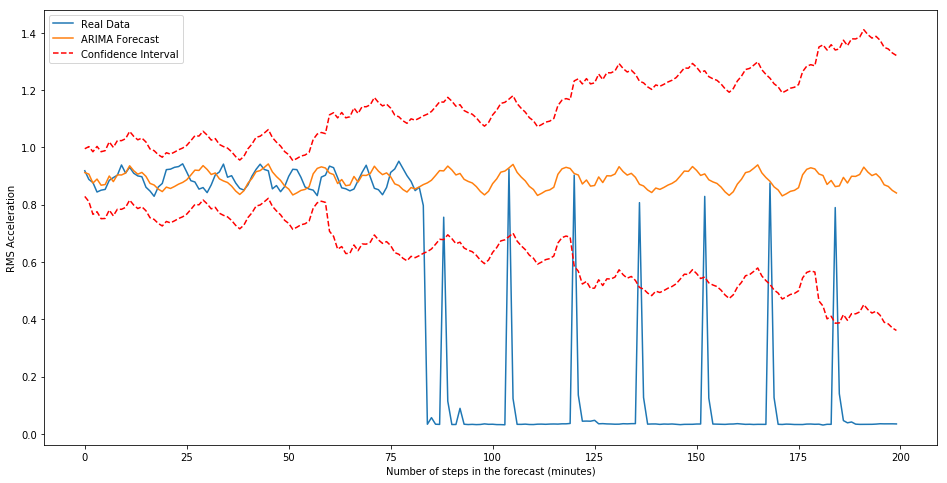

In [44]:
plt.figure(figsize=(16,8))
plt.plot(validation['RMS_Value'], label = 'Real Data')
plt.plot(forecast, label = 'ARIMA Forecast' )
plt.plot(lowInterval, label = 'Confidence Interval', ls='--',c='r')
plt.plot(upInterval, ls='--',c='r') 
plt.ylabel('RMS Acceleration')
plt.xlabel('Number of steps in the forecast (minutes)')
plt.legend(loc='best')
plt.show()


In [49]:
df.reset_index(drop=True, inplace=True)
df.head()


,RMS_Value
0,0.984083
1,1.246701
2,1.004492
3,0.979750
4,0.886278


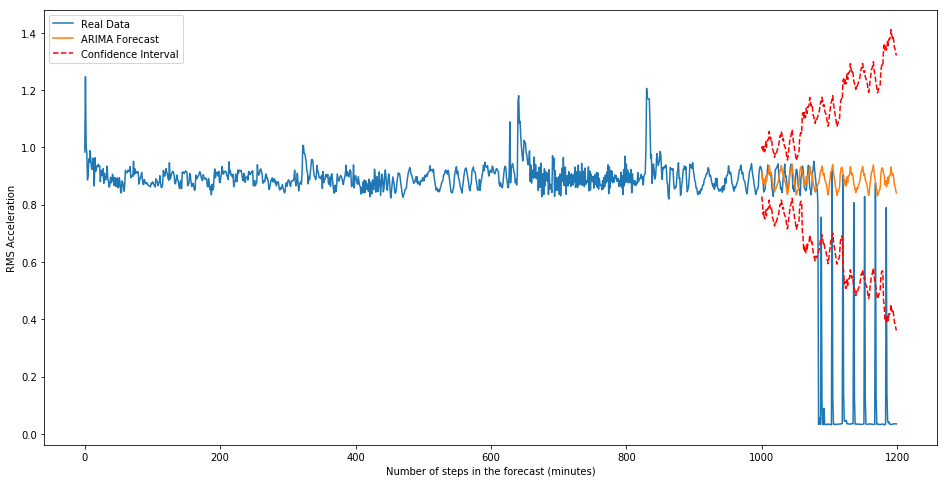

In [59]:
plt.figure(figsize=(16,8))
plt.plot(df['RMS_Value'], label = 'Real Data')
plt.plot(forecast, label = 'ARIMA Forecast' )
plt.plot(lowInterval, label = 'Confidence Interval', ls='--',c='r')
plt.plot(upInterval, ls='--',c='r')
plt.ylabel('RMS Acceleration')
plt.xlabel('Number of steps in the forecast (minutes)')
plt.legend(loc='best')
plt.show()

